# VISUALISATION DATA FROM GLOBAL MODEL MOZART4 and CAM-CHEM 

In [59]:
from netCDF4 import Dataset as NetCDFFile 
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import xarray as xr

# MOZART-4

In [61]:
mozart4_pth ='/exports/csce/datastore/geos/users/s1878599/WRFchem4.0/model/PREP_EMISS/MOZBC/data/mozart0001.nc'
nc = NetCDFFile(mozart4_pth)

In [62]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
lev = nc.variables['lev'][:]
ozone = nc.variables['O3_VMR_inst'][:] # ozone.
methane = nc.variables['CH4_VMR_inst'][:] # methane.
co = nc.variables['CO_VMR_inst'][:] #carbon monoxide.
form = nc.variables['CH2O_VMR_inst'][:] # formaldehyde.
no2 = nc.variables['NO2_VMR_inst'][:] 

In [4]:
o3_units = nc.variables['O3_VMR_inst'].units
ch4_units = nc.variables['CH4_VMR_inst'].units
co_units = nc.variables['CO_VMR_inst'].units
form_units = nc.variables['CH2O_VMR_inst'].units
no2_units = nc.variables['NO2_VMR_inst'].units

In [5]:
nc.close()

In [6]:
ozone.shape

(16, 56, 26, 29)

In [56]:
#DEFINITION OF PLOTTING FUNCTION

def plotvar(var_name, var_data, var_units, level):

    # Get some parameters for the Stereographic Projection
    lon_0 = lon.mean()
    lat_0 = lat.mean()
    lat_s = lat.min()
    lat_n = lat.max()
    lon_e = lon.max()
    lon_w = lon.min()

    #m = Basemap(llcrnrlon= lon_w, urcrnrlon=lon_e, llcrnrlat=lat_s, urcrnrlat=lat_n,
                #resolution='l',projection='merc', lat_ts=30,lat_0=lat_0,lon_0=lon_0)
        
    m = Basemap(llcrnrlon= 62, urcrnrlon=93, llcrnrlat=5, urcrnrlat=35,
                resolution='l',projection='merc', lat_ts=30,lat_0=lat_0,lon_0=lon_0)   
    
    # Because our lon and lat variables are 1D, use meshgrid to create 2D arrays 
    # Not necessary if coordinates are already in 2D arrays.
    ln, lt = np.meshgrid(lon, lat)
    x, y = m(ln, lt)
    
    # Plot Data

    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=5)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=5)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    #Plot
    cs = m.pcolor(x,y, var_data[13,level,:,:])

    # Add Title
    plt.title(var_name + ' at level ' + str(level))
    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%", format='%.2e')
    cbar.set_label(var_units)
    
    #set inline size of plot.
    plt.rcParams['figure.figsize'] = [12, 6]
    
    #Plot
    plt.show()

In [57]:
lat.shape

(26,)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


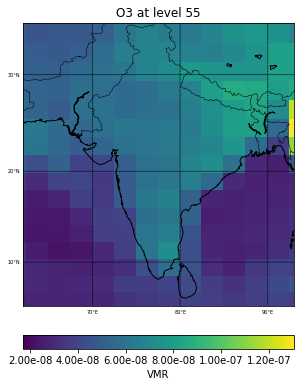

In [58]:
#Ozone
plotvar('O3', ozone, o3_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


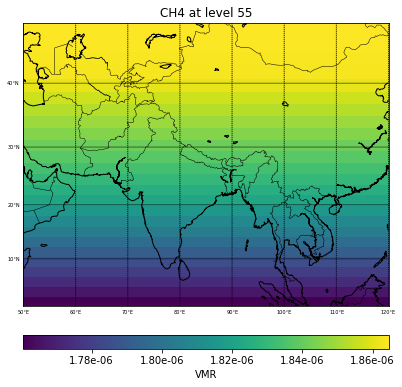

In [9]:
#methane
plotvar('CH4',methane, ch4_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


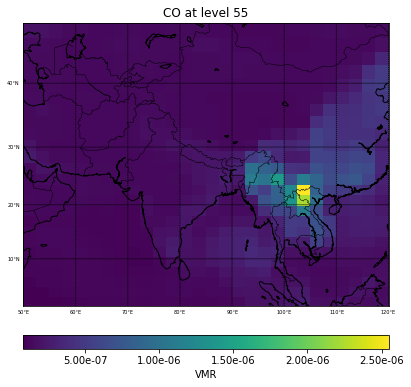

In [10]:
#carbon monoxide
plotvar('CO',co, co_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


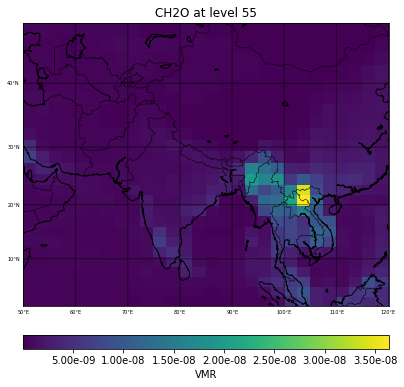

In [11]:
#Formaldehyde
plotvar('CH2O',form, form_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


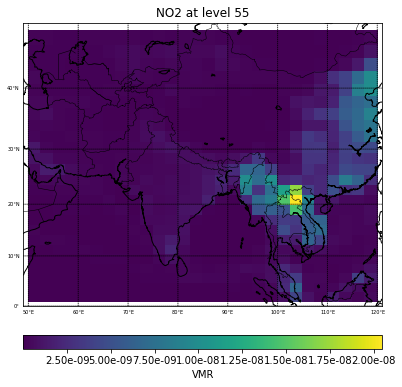

In [44]:
plotvar('NO2', no2, no2_units , 55)

# CAM-CHEM

In [13]:
camchem_pth ='/exports/csce/datastore/geos/users/s1878599/WRFchem4.0/model/PREP_EMISS/MOZBC/data/h0001_camchem.nc'
nc2 = NetCDFFile(camchem_pth)

In [14]:
lat_cc = nc2.variables['lat'][:]
lon_cc = nc2.variables['lon'][:]
time_cc = nc2.variables['time'][:]
lev_cc = nc2.variables['lev'][:]
ozone_cc = nc2.variables['O3'][:] # ozone.
methane_cc = nc2.variables['CH4'][:] # methane.
co_cc = nc2.variables['CO'][:] #carbon monoxide.
form_cc = nc2.variables['CH2O'][:] # formaldehyde.
pm25 = nc2.variables['PM25'][:] # pm2.5

In [15]:
o3_cc_units = nc2.variables['O3'].units
ch4_cc_units = nc2.variables['CH4'].units
co_cc_units = nc2.variables['CO'].units
form_cc_units = nc2.variables['CH2O'].units
pm25_units = nc2.variables['PM25'].units

In [16]:
nc2.close()

In [17]:
#DEFINITION OF PLOTTING FUNCTION

def plotvar2(var_name, var_data, var_units, level):

    # Get some parameters for the Stereographic Projection
    lon_0 = lon_cc.mean()
    lat_0 = lat_cc.mean()
    lat_s = lat_cc.min()
    lat_n = lat_cc.max()
    lon_e = lon_cc.max()
    lon_w = lon_cc.min()

    m = Basemap(llcrnrlon=50.0, urcrnrlon=120.0, llcrnrlat=0.94736844, urcrnrlat=48.31579,
                resolution='l',projection='merc', lat_ts=30,lat_0=lat_0,lon_0=lon_0)
    
    # Because our lon and lat variables are 1D, use meshgrid to create 2D arrays 
    # Not necessary if coordinates are already in 2D arrays.
    ln, lt = np.meshgrid(lon_cc, lat_cc)
    x, y = m(ln, lt)
    
    # Plot Data

    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=5)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=5)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    #Plot
    cs = m.pcolor(x,y, var_data[10,level,:,:])

    # Add Title
    plt.title(var_name + ' at level ' + str(level))
    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%", format='%.2e')
    cbar.set_label(var_units)
    
    #set inline size of plot.
    plt.rcParams['figure.figsize'] = [12, 6]
    
    #Plot
    plt.show()

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


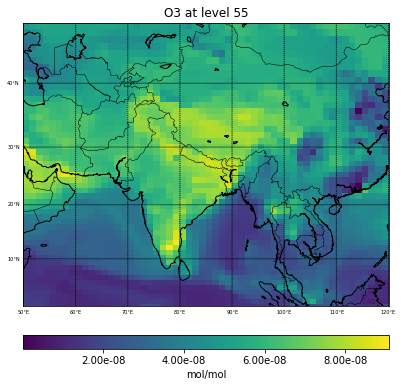

In [18]:
#Ozone
plotvar2('O3', ozone_cc, o3_cc_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


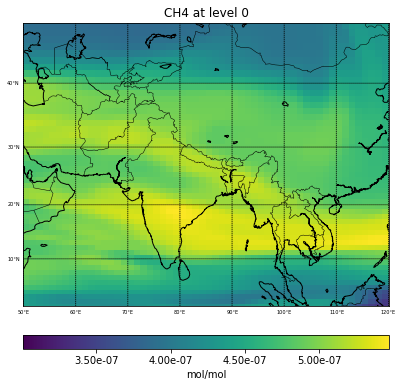

In [19]:
plotvar2('CH4', methane_cc, ch4_cc_units, 0)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


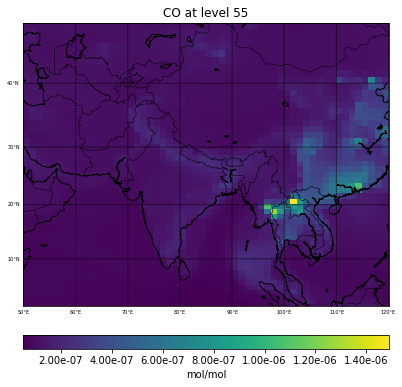

In [20]:
plotvar2('CO', co_cc, co_cc_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


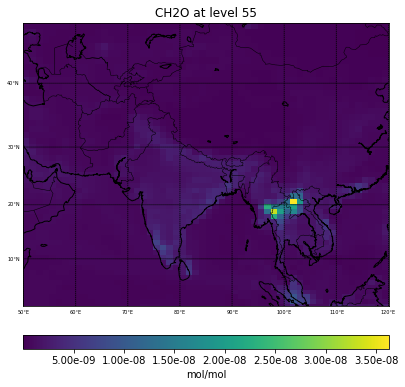

In [21]:
plotvar2('CH2O', form_cc, form_cc_units, 55)

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


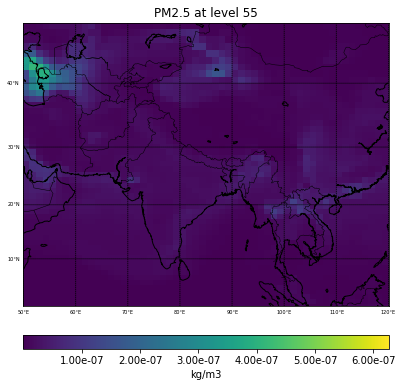

In [22]:
plotvar2('PM2.5', pm25, pm25_units, 55)

# Mean values over time MOZART-4

In [23]:
#using xr.array . Easier for manipulating and doing operations (means, sums, etc).
ds = xr.open_dataset(mozart4_pth, decode_times=False)

In [24]:
ds

<xarray.Dataset>
Dimensions:            (ilev: 57, lat: 26, lev: 56, lon: 29, time: 16)
Coordinates:
  * ilev               (ilev) float32 1.65079 2.08497 2.6202111 3.276431 ...
  * lat                (lat) float32 0.94736844 2.8421052 4.736842 6.631579 ...
  * lev                (lev) float32 1.86788 2.3525903 2.9483209 3.676501 ...
  * lon                (lon) float32 50.0 52.5 55.0 57.5 60.0 62.5 65.0 67.5 ...
  * time               (time) float64 7.342e+05 7.342e+05 7.342e+05 ...
Data variables:
    BIGALD_VMR_inst    (time, lev, lat, lon) float32 ...
    BIGALK_VMR_inst    (time, lev, lat, lon) float32 ...
    BIGENE_VMR_inst    (time, lev, lat, lon) float32 ...
    C10H16_VMR_inst    (time, lev, lat, lon) float32 ...
    C2H2_VMR_inst      (time, lev, lat, lon) float32 ...
    C2H4_VMR_inst      (time, lev, lat, lon) float32 ...
    C2H5OH_VMR_inst    (time, lev, lat, lon) float32 ...
    C2H6_VMR_inst      (time, lev, lat, lon) float32 ...
    C3H6_VMR_inst      (time, lev, lat,

In [25]:
O3mozart = ds.O3_VMR_inst

In [26]:
O3mozart

<xarray.DataArray 'O3_VMR_inst' (time: 16, lev: 56, lat: 26, lon: 29)>
[675584 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 0.94736844 2.8421052 4.736842 6.631579 8.526316 ...
  * lev      (lev) float32 1.86788 2.3525903 2.9483209 3.676501 4.561686 ...
  * lon      (lon) float32 50.0 52.5 55.0 57.5 60.0 62.5 65.0 67.5 70.0 72.5 ...
  * time     (time) float64 7.342e+05 7.342e+05 7.342e+05 7.342e+05 ...
Attributes:
    units:    VMR

In [27]:
O3mozart_mean = O3mozart.mean('time')

In [28]:
O3mozart_mean

<xarray.DataArray 'O3_VMR_inst' (lev: 56, lat: 26, lon: 29)>
array([[[4.631635e-06, 4.631635e-06, ..., 4.631635e-06, 4.631635e-06],
        [4.627219e-06, 4.627219e-06, ..., 4.627219e-06, 4.627219e-06],
        ...,
        [4.746575e-06, 4.746575e-06, ..., 4.746575e-06, 4.746575e-06],
        [4.790480e-06, 4.790480e-06, ..., 4.790480e-06, 4.790480e-06]],

       [[5.521421e-06, 5.521421e-06, ..., 5.521421e-06, 5.521421e-06],
        [5.515023e-06, 5.515023e-06, ..., 5.515023e-06, 5.515023e-06],
        ...,
        [5.603636e-06, 5.603636e-06, ..., 5.603636e-06, 5.603636e-06],
        [5.637385e-06, 5.637385e-06, ..., 5.637385e-06, 5.637385e-06]],

       ...,

       [[1.973948e-08, 1.877217e-08, ..., 2.451485e-08, 2.053686e-08],
        [2.315496e-08, 2.391982e-08, ..., 2.588069e-08, 2.485624e-08],
        ...,
        [3.357564e-08, 3.541939e-08, ..., 4.990452e-08, 4.924113e-08],
        [3.697084e-08, 3.874555e-08, ..., 4.999795e-08, 5.064786e-08]],

       [[1.969858e-08, 1.8740

In [29]:
#DEFINITION OF PLOTTING FUNCTION

def plotmean(var_name, var_data, var_units, level):

    # Get some parameters for the Stereographic Projection
    lon_0 = ds.lat.mean()
    lat_0 = ds.lon.mean()
    lat_s = ds.lat.min()
    lat_n = ds.lat.max()
    lon_e = ds.lon.max()
    lon_w = ds.lon.min()

    m = Basemap(llcrnrlon=50.0, urcrnrlon=120.0, llcrnrlat=0.94736844, urcrnrlat=48.31579,
                resolution='l',projection='merc', lat_ts=30,lat_0=lat_0,lon_0=lon_0)
    
    # Because our lon and lat variables are 1D, use meshgrid to create 2D arrays 
    # Not necessary if coordinates are already in 2D arrays.
    ln, lt = np.meshgrid(ds.lon, ds.lat)
    x, y = m(ln, lt)
    
    # Plot Data

    # Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=5)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=5)

    # Add Coastlines, States, and Country Boundaries
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    #Plot
    cs = m.pcolor(x,y, O3mozart_mean.sel(lev=lev[level], method='nearest'))

    # Add Title
    plt.title(var_name + ' at level ' + str(level))
    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%", format='%.2e')
    cbar.set_label(var_units)
    
    #set inline size of plot.
    plt.rcParams['figure.figsize'] = [20, 10]
    
    #Plot
    plt.show()

/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


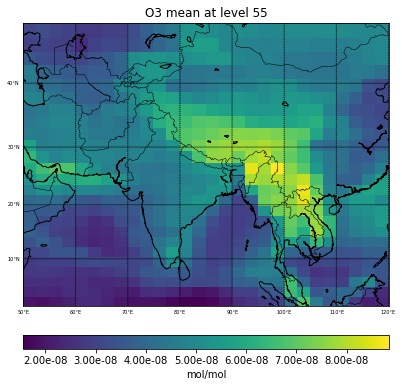

In [30]:
plotmean('O3 mean', O3mozart_mean, o3_cc_units, 55)

In [ ]:
ds.Dat